In [20]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [21]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [22]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp



,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [23]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [24]:
tox_list_bak=[ 'TOX21_AR_BLA_Antagonist_viability', 'TOX21_ERa_BLA_Antagonist_viability', 'TOX21_ESRE_BLA_viability', 'TOX21_FXR_BLA_antagonist_viability', 'TOX21_GR_BLA_Antagonist_viability', 'TOX21_HSE_BLA_agonist_viability', 'TOX21_MMP_viability', 'TOX21_NFkB_BLA_agonist_viability', 'TOX21_p53_BLA_p1_viability', 'TOX21_p53_BLA_p2_viability', 'TOX21_p53_BLA_p3_viability', 'TOX21_p53_BLA_p4_viability', 'TOX21_p53_BLA_p5_viability', 'TOX21_PPARg_BLA_antagonist_viability', 'TOX21_VDR_BLA_Agonist_viability', 'TOX21_VDR_BLA_antagonist_viability', 'BSK_3C_SRB_down', 'BSK_4H_SRB_down', 'BSK_BE3C_SRB_down', 'BSK_CASM3C_SRB_down', 'BSK_hDFCGF_SRB_down', 'BSK_KF3CT_SRB_down', 'BSK_LPS_SRB_down', 'BSK_SAg_PBMCCytotoxicity_down', 'BSK_SAg_SRB_down', 'ACEA_T47D_80hr_Negative', 'APR_HepG2_CellLoss_24h_dn', 'APR_HepG2_CellLoss_72h_dn', 'BSK_3C_Proliferation_down', 'BSK_3C_Vis_down', 'BSK_CASM3C_Proliferation_down', 'BSK_hDFCGF_Proliferation_down', 'BSK_SAg_Proliferation_down', 'smiles_r' ]

In [62]:
tox_list1=[  'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative',
             'smiles_r']

tox_list=[   'BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative']

In [63]:
our_data=toxcast.reindex(columns=tox_list)

In [64]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def ErGFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetErGFingerprint(x))



In [66]:
from sklearn.feature_selection import VarianceThreshold



In [67]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [68]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [69]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [70]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [71]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

In [72]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [73]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


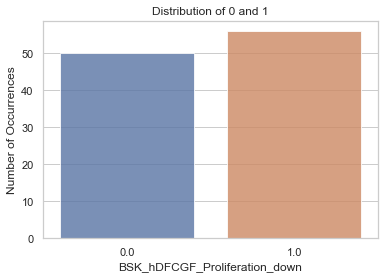

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


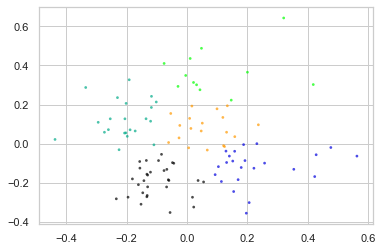

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


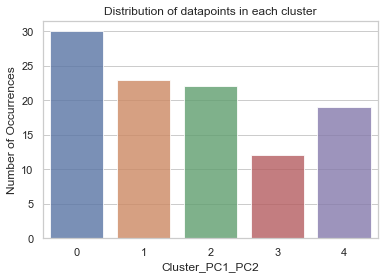

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    4.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   31.7s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   46.8s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1 21]
 [ 1  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.05      0.08        22
         1.0       0.25      0.88      0.39         8

    accuracy                           0.27        30
   macro avg       0.38      0.46      0.24        30
weighted avg       0.43      0.27      0.16        30

Total Selected train:  83
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.5s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   49.2s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6 11]
 [ 1  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.86      0.35      0.50        17
         1.0       0.31      0.83      0.45         6

    accuracy                           0.48        23
   macro avg       0.58      0.59      0.48        23
weighted avg       0.72      0.48      0.49        23

Total Selected train:  84
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   30.9s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   45.6s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 1  0]
 [13  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.07      1.00      0.13         1
         1.0       1.00      0.38      0.55        21

    accuracy                           0.41        22
   macro avg       0.54      0.69      0.34        22
weighted avg       0.96      0.41      0.53        22

Total Selected train:  87
Total Selecte

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   30.9s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   46.5s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 3]
 [4 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.67      0.63         9
         1.0       0.67      0.60      0.63        10

    accuracy                           0.63        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.64      0.63      0.63        19

Total Selected train:  94
Total Selected test:  12

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   31.0s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   46.4s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 0]
 [5 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.17      1.00      0.29         1
         1.0       1.00      0.55      0.71        11

    accuracy                           0.58        12
   macro avg       0.58      0.77      0.50        12
weighted avg       0.93      0.58      0.67        12



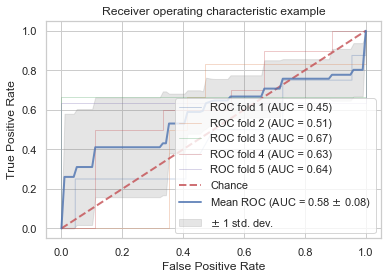

Mean of Each fold


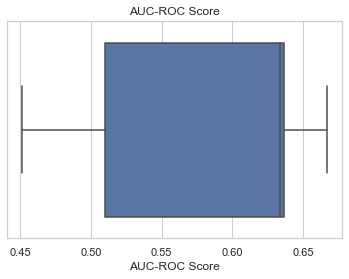

AUC-ROC all:  [0.45170454545454547, 0.5098039215686275, 0.6666666666666666, 0.6333333333333333, 0.6363636363636364]
AUC-ROC = 0.58 ± 0.08)


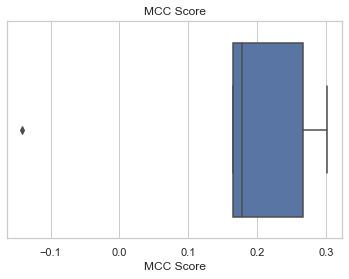

Matthews_corrcoef all:  [-0.14101901870444156, 0.17776428228421592, 0.1649572197684645, 0.26666666666666666, 0.30151134457776363]
Matthews_corrcoef = 0.154 ± 0.156)


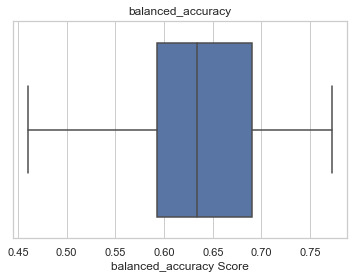

balanced_accuracy all:  [0.4602272727272727, 0.5931372549019608, 0.6904761904761905, 0.6333333333333333, 0.7727272727272727]
balanced_accuracy = 0.63 ± 0.10)


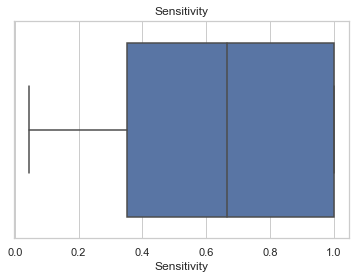

Sensitivity all:  [0.045454545454545456, 0.35294117647058826, 1.0, 0.6666666666666666, 1.0]
Sensitivity = 0.61 ± 0.37)


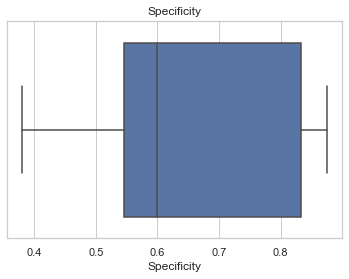

Specificity all:  [0.875, 0.8333333333333334, 0.38095238095238093, 0.6, 0.5454545454545454]
Specificity = 0.65 ± 0.18)
One Combined Confusion Matrix
conf_matrix: 
  [[15 35]
 [24 32]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.38      0.30      0.34        50
         1.0       0.48      0.57      0.52        56

    accuracy                           0.44       106
   macro avg       0.43      0.44      0.43       106
weighted avg       0.43      0.44      0.43       106

matthews_corrcoef
-0.1330925604755133
balanced_accuracy_score
0.4357142857142857
Sensitivity
0.3
Specificity
0.5714285714285714
AUC-ROC for the combined results: 


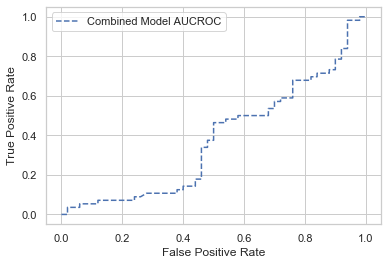

Combined Model AUC ROC:  0.3769642857142857
Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


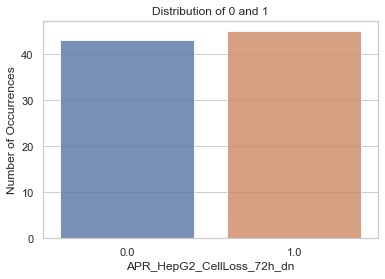

Total Compounds in Assay:  88
pca explained variance by first two components:  0.7196696700655922


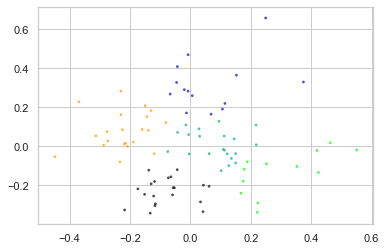

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


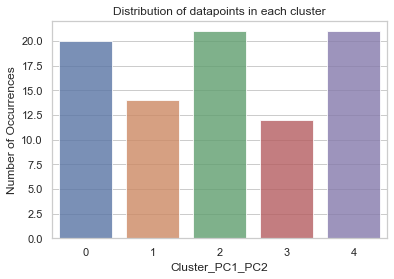

Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.4s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   47.4s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  1]
 [13  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.13      0.67      0.22         3
         1.0       0.83      0.28      0.42        18

    accuracy                           0.33        21
   macro avg       0.48      0.47      0.32        21
weighted avg       0.73      0.33      0.39        21

Total Selected train:  67
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   31.8s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   46.8s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.75      0.75        12
         1.0       0.67      0.67      0.67         9

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21

Total Selected train:  68
Total Selected test:  2

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.9s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   48.4s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2 15]
 [ 0  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.12      0.21        17
         1.0       0.17      1.00      0.29         3

    accuracy                           0.25        20
   macro avg       0.58      0.56      0.25        20
weighted avg       0.88      0.25      0.22        20

Total Selected train:  74
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   12.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   21.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   33.8s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   48.9s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 2]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.20      0.33      0.25         3
         1.0       0.78      0.64      0.70        11

    accuracy                           0.57        14
   macro avg       0.49      0.48      0.48        14
weighted avg       0.65      0.57      0.60        14

Total Selected train:  76
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.5s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   48.2s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 2]
 [4 0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.75      0.67         8
         1.0       0.00      0.00      0.00         4

    accuracy                           0.50        12
   macro avg       0.30      0.38      0.33        12
weighted avg       0.40      0.50      0.44        12



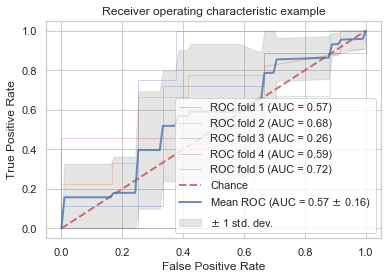

Mean of Each fold


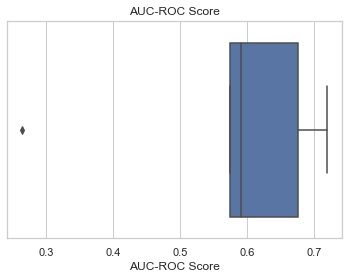

AUC-ROC all:  [0.5740740740740742, 0.6759259259259259, 0.2647058823529411, 0.5909090909090908, 0.71875]
AUC-ROC = 0.56 ± 0.16)


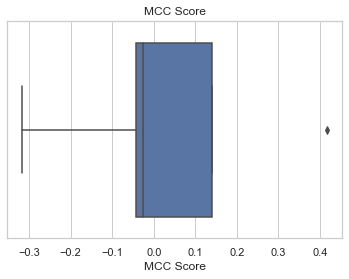

Matthews_corrcoef all:  [-0.04303314829119353, 0.4166666666666667, 0.140028008402801, -0.025949964805384102, -0.31622776601683794]
Matthews_corrcoef = 0.034 ± 0.241)


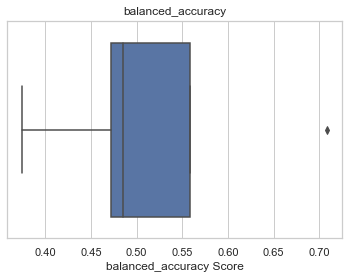

balanced_accuracy all:  [0.4722222222222222, 0.7083333333333333, 0.5588235294117647, 0.48484848484848486, 0.375]
balanced_accuracy = 0.52 ± 0.11)


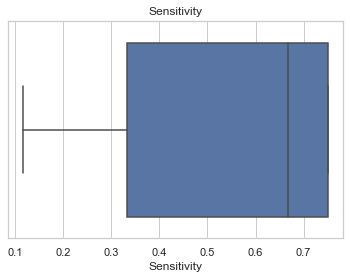

Sensitivity all:  [0.6666666666666666, 0.75, 0.11764705882352941, 0.3333333333333333, 0.75]
Sensitivity = 0.52 ± 0.25)


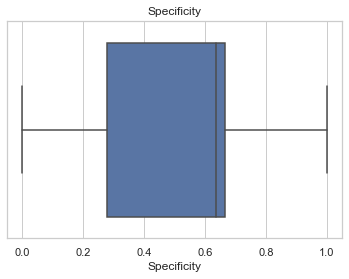

Specificity all:  [0.2777777777777778, 0.6666666666666666, 1.0, 0.6363636363636364, 0.0]
Specificity = 0.52 ± 0.34)
One Combined Confusion Matrix
conf_matrix: 
  [[20 23]
 [24 21]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.45      0.47      0.46        43
         1.0       0.48      0.47      0.47        45

    accuracy                           0.47        88
   macro avg       0.47      0.47      0.47        88
weighted avg       0.47      0.47      0.47        88

matthews_corrcoef
-0.06819943394704735
balanced_accuracy_score
0.4658914728682171
Sensitivity
0.46511627906976744
Specificity
0.4666666666666667
AUC-ROC for the combined results: 


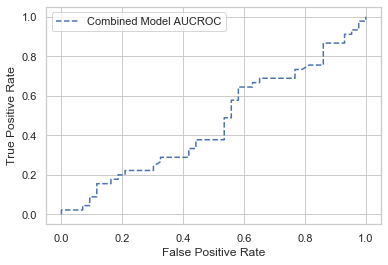

Combined Model AUC ROC:  0.4630490956072351
Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


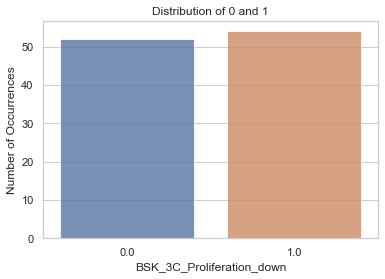

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


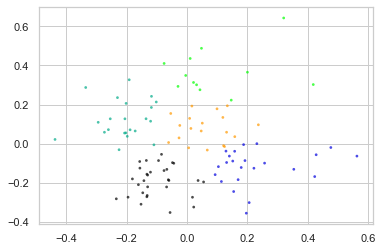

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


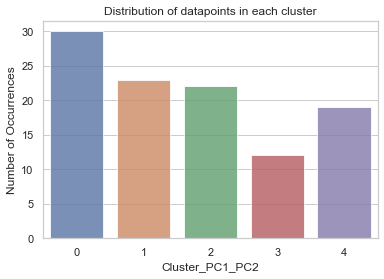

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   31.9s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   49.0s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2 16]
 [ 0 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.11      0.20        18
         1.0       0.43      1.00      0.60        12

    accuracy                           0.47        30
   macro avg       0.71      0.56      0.40        30
weighted avg       0.77      0.47      0.36        30

Total Selected train:  83
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   19.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.2s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   47.7s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  7]
 [ 1  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.61      0.73        18
         1.0       0.36      0.80      0.50         5

    accuracy                           0.65        23
   macro avg       0.64      0.71      0.62        23
weighted avg       0.80      0.65      0.68        23

Total Selected train:  84
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   33.3s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   48.6s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2  0]
 [13  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.13      1.00      0.24         2
         1.0       1.00      0.35      0.52        20

    accuracy                           0.41        22
   macro avg       0.57      0.68      0.38        22
weighted avg       0.92      0.41      0.49        22

Total Selected train:  87
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   32.4s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   47.9s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  2.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 6]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        12
         1.0       0.40      0.57      0.47         7

    accuracy                           0.53        19
   macro avg       0.53      0.54      0.52        19
weighted avg       0.57      0.53      0.53        19

Total Selected train:  94
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   22.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   44.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[1 1]
 [8 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.11      0.50      0.18         2
         1.0       0.67      0.20      0.31        10

    accuracy                           0.25        12
   macro avg       0.39      0.35      0.24        12
weighted avg       0.57      0.25      0.29        12



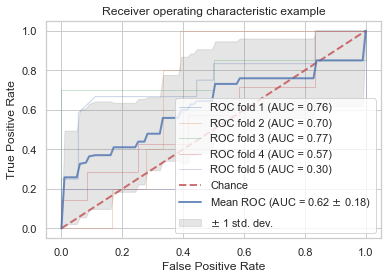

Mean of Each fold


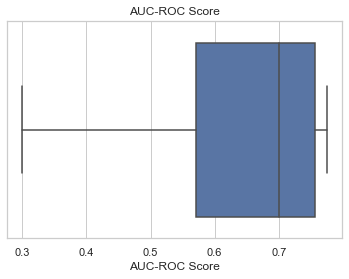

AUC-ROC all:  [0.7569444444444444, 0.7000000000000001, 0.7749999999999999, 0.5714285714285714, 0.30000000000000004]
AUC-ROC = 0.62 ± 0.18)


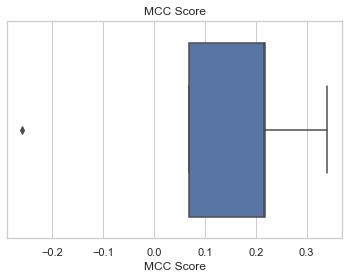

Matthews_corrcoef all:  [0.21821789023599236, 0.3394638275806278, 0.2160246899469287, 0.06900655593423542, -0.25819888974716115]
Matthews_corrcoef = 0.117 ± 0.206)


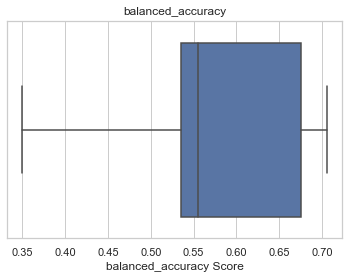

balanced_accuracy all:  [0.5555555555555556, 0.7055555555555556, 0.675, 0.5357142857142857, 0.35]
balanced_accuracy = 0.56 ± 0.13)


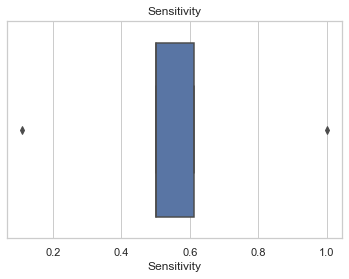

Sensitivity all:  [0.1111111111111111, 0.6111111111111112, 1.0, 0.5, 0.5]
Sensitivity = 0.54 ± 0.28)


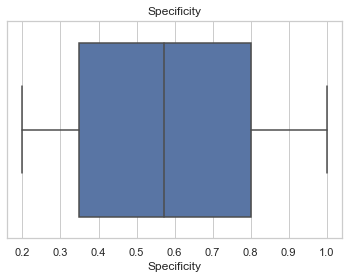

Specificity all:  [1.0, 0.8, 0.35, 0.5714285714285714, 0.2]
Specificity = 0.58 ± 0.29)
One Combined Confusion Matrix
conf_matrix: 
  [[22 30]
 [25 29]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.47      0.42      0.44        52
         1.0       0.49      0.54      0.51        54

    accuracy                           0.48       106
   macro avg       0.48      0.48      0.48       106
weighted avg       0.48      0.48      0.48       106

matthews_corrcoef
-0.040136965592045694
balanced_accuracy_score
0.48005698005698005
Sensitivity
0.4230769230769231
Specificity
0.5370370370370371
AUC-ROC for the combined results: 


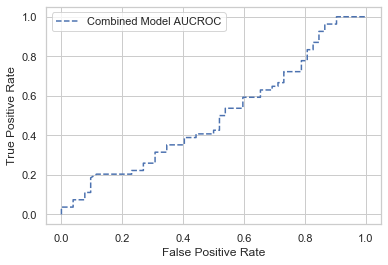

Combined Model AUC ROC:  0.4959045584045584
Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


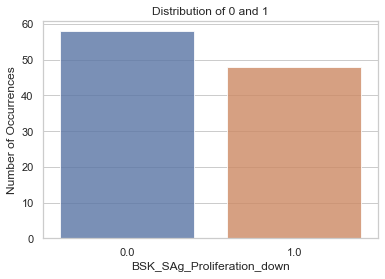

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


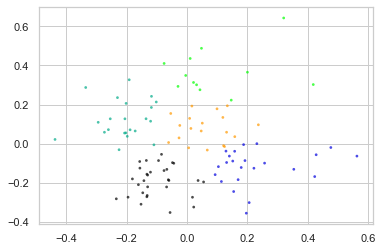

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


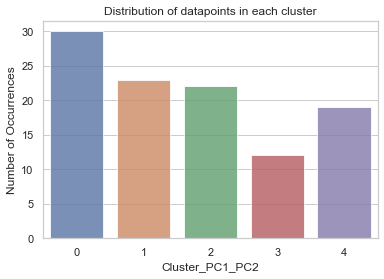

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   55.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4 19]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.17      0.27        23
         1.0       0.17      0.57      0.27         7

    accuracy                           0.27        30
   macro avg       0.37      0.37      0.27        30
weighted avg       0.48      0.27      0.27        30

Total Selected train:  83
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   22.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  4]
 [ 2  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.76      0.81        17
         1.0       0.50      0.67      0.57         6

    accuracy                           0.74        23
   macro avg       0.68      0.72      0.69        23
weighted avg       0.77      0.74      0.75        23

Total Selected train:  84
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   53.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4  0]
 [15  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.21      1.00      0.35         4
         1.0       1.00      0.17      0.29        18

    accuracy                           0.32        22
   macro avg       0.61      0.58      0.32        22
weighted avg       0.86      0.32      0.30        22

Total Selected train:  87
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 6]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.50      0.57        12
         1.0       0.40      0.57      0.47         7

    accuracy                           0.53        19
   macro avg       0.53      0.54      0.52        19
weighted avg       0.57      0.53      0.53        19

Total Selected train:  94
Total Selected test: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   53.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[0 2]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.71      0.50      0.59        10

    accuracy                           0.42        12
   macro avg       0.36      0.25      0.29        12
weighted avg       0.60      0.42      0.49        12



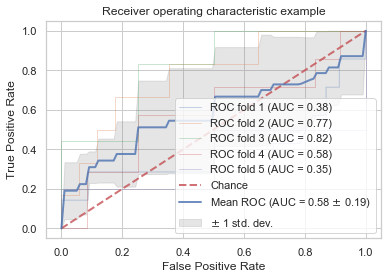

Mean of Each fold


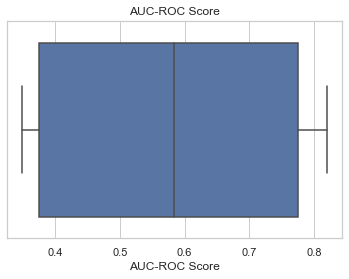

AUC-ROC all:  [0.37577639751552794, 0.7745098039215687, 0.8194444444444444, 0.5833333333333333, 0.35]
AUC-ROC = 0.58 ± 0.19)


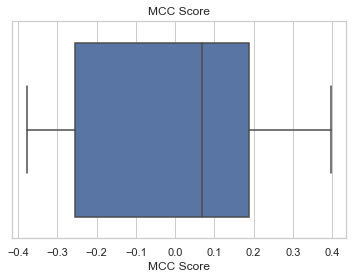

Matthews_corrcoef all:  [-0.2546583850931677, 0.397705839334203, 0.18731716231633883, 0.06900655593423542, -0.37796447300922725]
Matthews_corrcoef = 0.004 ± 0.285)


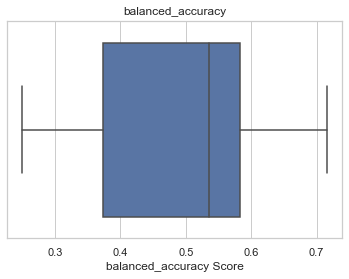

balanced_accuracy all:  [0.37267080745341613, 0.7156862745098038, 0.5833333333333334, 0.5357142857142857, 0.25]
balanced_accuracy = 0.49 ± 0.16)


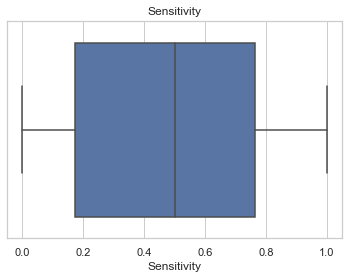

Sensitivity all:  [0.17391304347826086, 0.7647058823529411, 1.0, 0.5, 0.0]
Sensitivity = 0.49 ± 0.37)


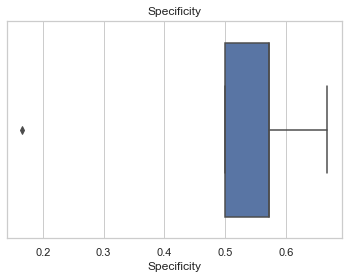

Specificity all:  [0.5714285714285714, 0.6666666666666666, 0.16666666666666666, 0.5714285714285714, 0.5]
Specificity = 0.50 ± 0.17)
One Combined Confusion Matrix
conf_matrix: 
  [[27 31]
 [28 20]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.47      0.48        58
         1.0       0.39      0.42      0.40        48

    accuracy                           0.44       106
   macro avg       0.44      0.44      0.44       106
weighted avg       0.45      0.44      0.44       106

matthews_corrcoef
-0.11737424060173536
balanced_accuracy_score
0.4410919540229885
Sensitivity
0.46551724137931033
Specificity
0.4166666666666667
AUC-ROC for the combined results: 


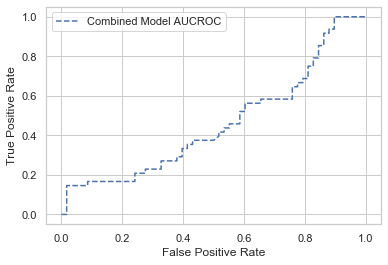

Combined Model AUC ROC:  0.45851293103448276
Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


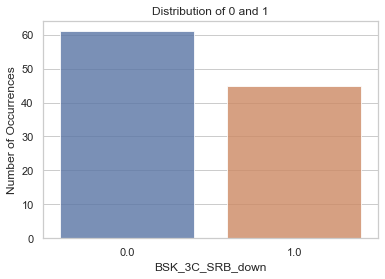

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


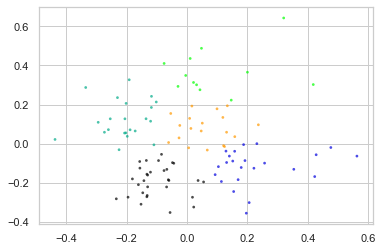

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


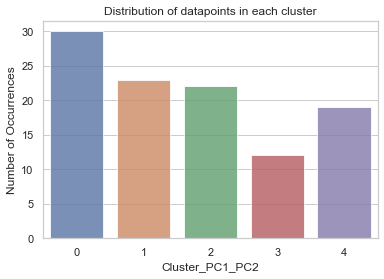

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4 18]
 [ 1  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.18      0.30        22
         1.0       0.28      0.88      0.42         8

    accuracy                           0.37        30
   macro avg       0.54      0.53      0.36        30
weighted avg       0.66      0.37      0.33        30

Total Selected train:  83
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  4]
 [ 4  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79        19
         1.0       0.00      0.00      0.00         4

    accuracy                           0.65        23
   macro avg       0.39      0.39      0.39        23
weighted avg       0.65      0.65      0.65        23

Total Selected train:  84
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 3  0]
 [19  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.14      1.00      0.24         3
         1.0       0.00      0.00      0.00        19

    accuracy                           0.14        22
   macro avg       0.07      0.50      0.12        22
weighted avg       0.02      0.14      0.03        22



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  87
Total Selected test:  19
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.67      0.64        12
         1.0       0.33      0.29      0.31         7

    accuracy                           0.53        19
   macro avg       0.47      0.48      0.47        19
weighted avg       0.51      0.53      0.52        19

Total Selected train:  94
Total Selected 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 0]
 [7 0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


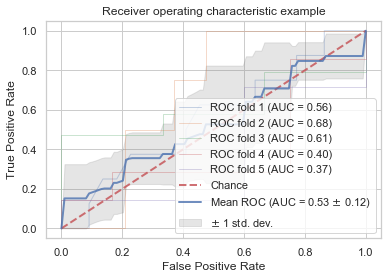

Mean of Each fold


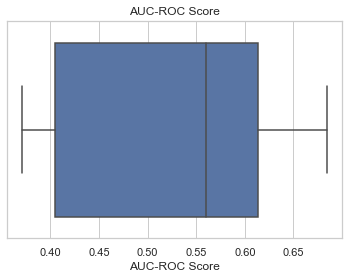

AUC-ROC all:  [0.5596590909090909, 0.6842105263157896, 0.6140350877192983, 0.40476190476190477, 0.37142857142857144]
AUC-ROC = 0.53 ± 0.12)


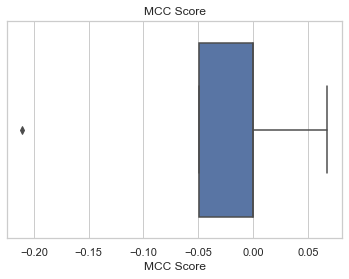

Matthews_corrcoef all:  [0.06741998624632421, -0.21052631578947367, 0.0, -0.049416621110740085, 0.0]
Matthews_corrcoef = -0.039 ± 0.094)


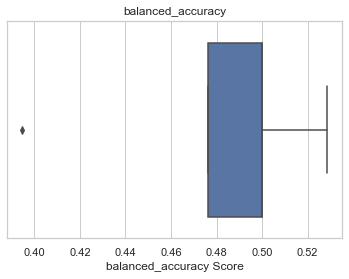

balanced_accuracy all:  [0.5284090909090909, 0.39473684210526316, 0.5, 0.47619047619047616, 0.5]
balanced_accuracy = 0.48 ± 0.05)


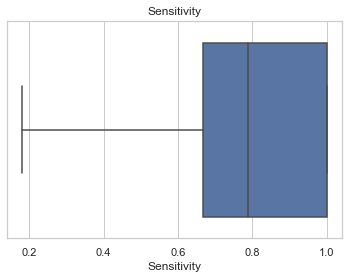

Sensitivity all:  [0.18181818181818182, 0.7894736842105263, 1.0, 0.6666666666666666, 1.0]
Sensitivity = 0.73 ± 0.30)


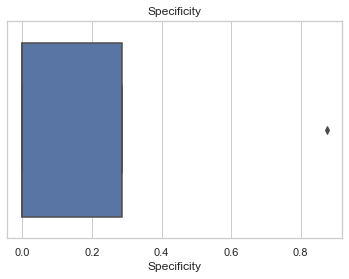

Specificity all:  [0.875, 0.0, 0.0, 0.2857142857142857, 0.0]
Specificity = 0.23 ± 0.34)
One Combined Confusion Matrix
conf_matrix: 
  [[35 26]
 [36  9]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.57      0.53        61
         1.0       0.26      0.20      0.23        45

    accuracy                           0.42       106
   macro avg       0.38      0.39      0.38       106
weighted avg       0.39      0.42      0.40       106

matthews_corrcoef
-0.23777009387497294
balanced_accuracy_score
0.3868852459016393
Sensitivity
0.5737704918032787
Specificity
0.2
AUC-ROC for the combined results: 


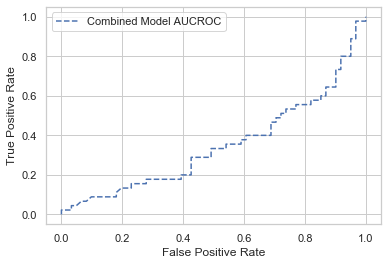

Combined Model AUC ROC:  0.34845173041894356
Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


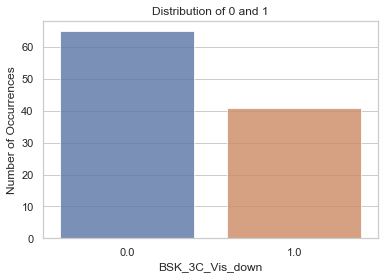

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


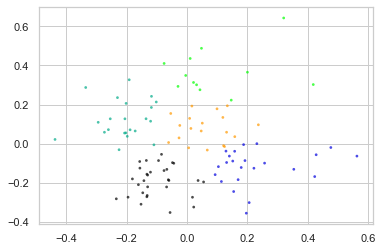

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


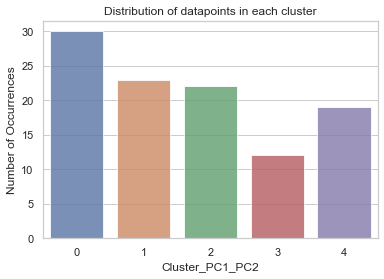

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4 19]
 [ 0  7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.17      0.30        23
         1.0       0.27      1.00      0.42         7

    accuracy                           0.37        30
   macro avg       0.63      0.59      0.36        30
weighted avg       0.83      0.37      0.33        30

Total Selected train:  83
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  2]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        19
         1.0       0.60      0.75      0.67         4

    accuracy                           0.87        23
   macro avg       0.77      0.82      0.79        23
weighted avg       0.88      0.87      0.88        23

Total Selected train:  84
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 4  0]
 [18  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.18      1.00      0.31         4
         1.0       0.00      0.00      0.00        18

    accuracy                           0.18        22
   macro avg       0.09      0.50      0.15        22
weighted avg       0.03      0.18      0.06        22



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  87
Total Selected test:  19
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   26.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   54.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.86      0.83        14
         1.0       0.50      0.40      0.44         5

    accuracy                           0.74        19
   macro avg       0.65      0.63      0.64        19
weighted avg       0.72      0.74      0.73        19

Total Selected train:  94
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   22.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 2]
 [7 0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.30      0.60      0.40         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.25        12
   macro avg       0.15      0.30      0.20        12
weighted avg       0.12      0.25      0.17        12



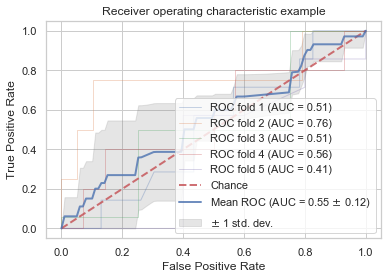

Mean of Each fold


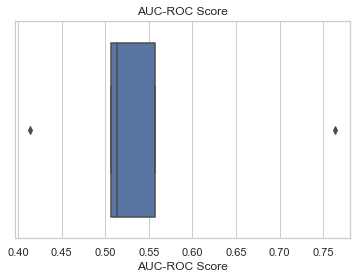

AUC-ROC all:  [0.5062111801242236, 0.7631578947368421, 0.5138888888888888, 0.5571428571428572, 0.41428571428571426]
AUC-ROC = 0.55 ± 0.12)


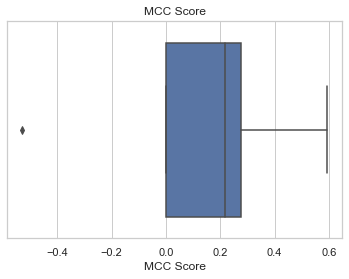

Matthews_corrcoef all:  [0.2163856337073152, 0.5924722709231762, 0.0, 0.27774602993176545, -0.5291502622129182]
Matthews_corrcoef = 0.111 ± 0.372)


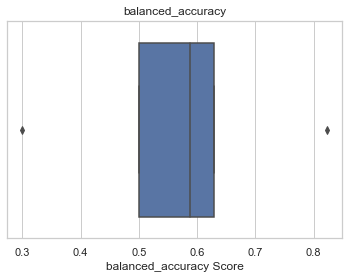

balanced_accuracy all:  [0.5869565217391304, 0.8223684210526316, 0.5, 0.6285714285714286, 0.3]
balanced_accuracy = 0.57 ± 0.17)


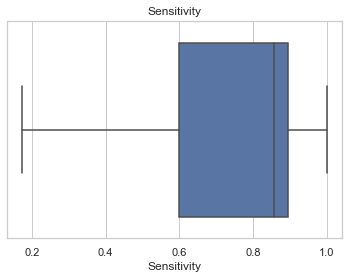

Sensitivity all:  [0.17391304347826086, 0.8947368421052632, 1.0, 0.8571428571428571, 0.6]
Sensitivity = 0.71 ± 0.30)


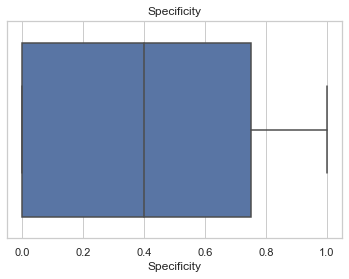

Specificity all:  [1.0, 0.75, 0.0, 0.4, 0.0]
Specificity = 0.43 ± 0.40)
One Combined Confusion Matrix
conf_matrix: 
  [[40 25]
 [29 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.62      0.60        65
         1.0       0.32      0.29      0.31        41

    accuracy                           0.49       106
   macro avg       0.45      0.45      0.45       106
weighted avg       0.48      0.49      0.49       106

matthews_corrcoef
-0.09392735014055052
balanced_accuracy_score
0.4540337711069419
Sensitivity
0.6153846153846154
Specificity
0.2926829268292683
AUC-ROC for the combined results: 


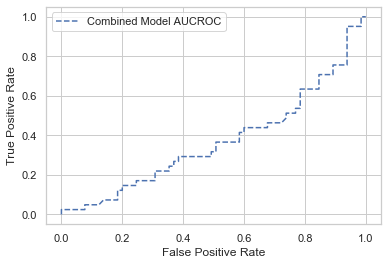

Combined Model AUC ROC:  0.36885553470919324
Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


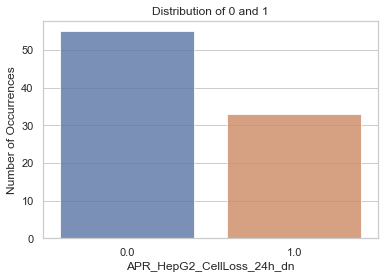

Total Compounds in Assay:  88
pca explained variance by first two components:  0.7196696700655922


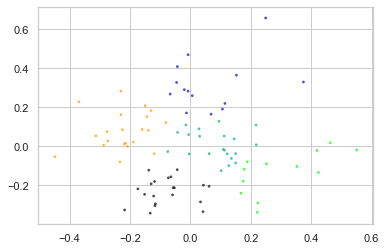

Start
4    21
2    21
0    20
1    14
3    12
Name: Cluster_PC1_PC2, dtype: int64


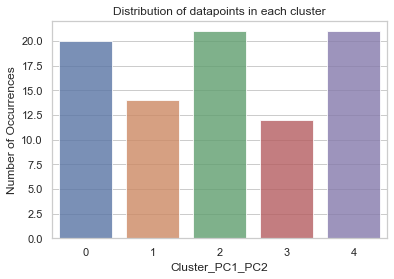

Total Selected train:  67
Total Selected test:  21
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   20.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   42.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 5  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.26      1.00      0.42         5
         1.0       1.00      0.12      0.22        16

    accuracy                           0.33        21
   macro avg       0.63      0.56      0.32        21
weighted avg       0.82      0.33      0.27        21

Total Selected train:  67
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   50.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  1]
 [ 3  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88        16
         1.0       0.67      0.40      0.50         5

    accuracy                           0.81        21
   macro avg       0.75      0.67      0.69        21
weighted avg       0.79      0.81      0.79        21

Total Selected train:  68
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 2 16]
 [ 0  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.11      0.20        18
         1.0       0.11      1.00      0.20         2

    accuracy                           0.20        20
   macro avg       0.56      0.56      0.20        20
weighted avg       0.91      0.20      0.20        20

Total Selected train:  74
Total Sele

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 1]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.55      0.86      0.67         7
         1.0       0.67      0.29      0.40         7

    accuracy                           0.57        14
   macro avg       0.61      0.57      0.53        14
weighted avg       0.61      0.57      0.53        14

Total Selected train:  76
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [3 0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80         9
         1.0       0.00      0.00      0.00         3

    accuracy                           0.67        12
   macro avg       0.36      0.44      0.40        12
weighted avg       0.55      0.67      0.60        12



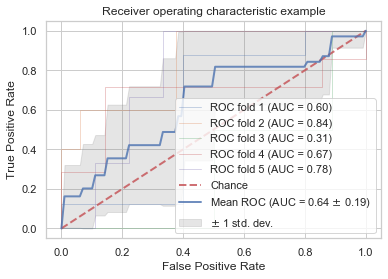

Mean of Each fold


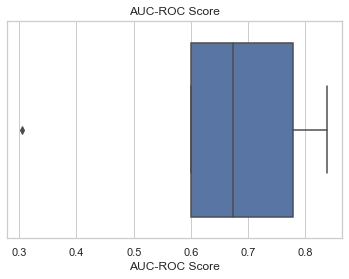

AUC-ROC all:  [0.6, 0.8375, 0.3055555555555556, 0.6734693877551021, 0.7777777777777779]
AUC-ROC = 0.64 ± 0.19)


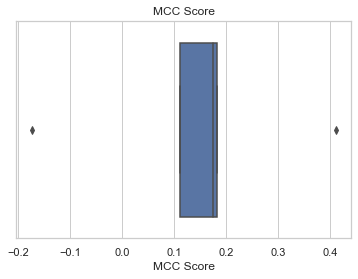

Matthews_corrcoef all:  [0.18136906252750293, 0.4107919181288746, 0.1111111111111111, 0.17407765595569785, -0.17407765595569785]
Matthews_corrcoef = 0.141 ± 0.187)


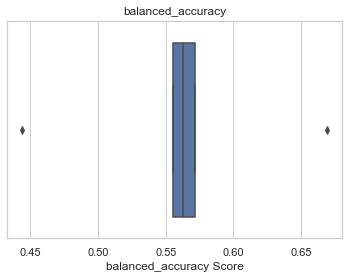

balanced_accuracy all:  [0.5625, 0.66875, 0.5555555555555556, 0.5714285714285714, 0.4444444444444444]
balanced_accuracy = 0.56 ± 0.07)


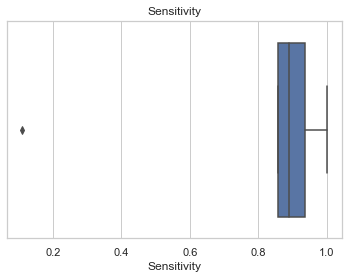

Sensitivity all:  [1.0, 0.9375, 0.1111111111111111, 0.8571428571428571, 0.8888888888888888]
Sensitivity = 0.76 ± 0.33)


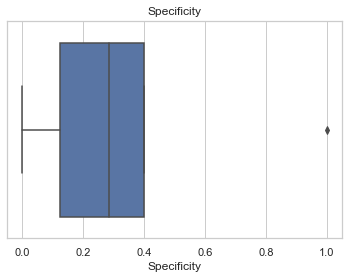

Specificity all:  [0.125, 0.4, 1.0, 0.2857142857142857, 0.0]
Specificity = 0.36 ± 0.35)
One Combined Confusion Matrix
conf_matrix: 
  [[36 19]
 [25  8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.65      0.62        55
         1.0       0.30      0.24      0.27        33

    accuracy                           0.50        88
   macro avg       0.44      0.45      0.44        88
weighted avg       0.48      0.50      0.49        88

matthews_corrcoef
-0.1081574631481751
balanced_accuracy_score
0.4484848484848485
Sensitivity
0.6545454545454545
Specificity
0.24242424242424243
AUC-ROC for the combined results: 


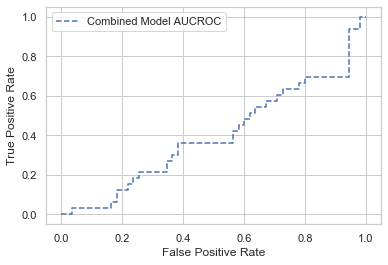

Combined Model AUC ROC:  0.39779614325068874
Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


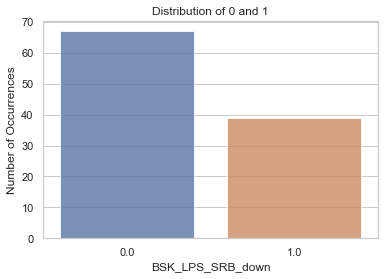

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


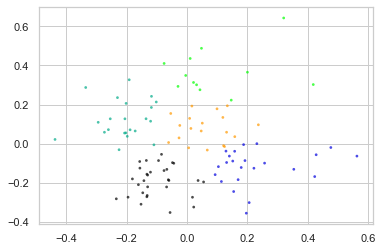

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


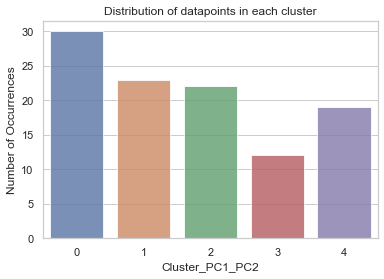

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.5s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 9 16]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.36      0.50        25
         1.0       0.16      0.60      0.25         5

    accuracy                           0.40        30
   macro avg       0.49      0.48      0.38        30
weighted avg       0.71      0.40      0.46        30

Total Selected train:  83
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  4]
 [ 2  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.88      0.78      0.82        18
         1.0       0.43      0.60      0.50         5

    accuracy                           0.74        23
   macro avg       0.65      0.69      0.66        23
weighted avg       0.78      0.74      0.75        23

Total Selected train:  84
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [13  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.32      1.00      0.48         6
         1.0       1.00      0.19      0.32        16

    accuracy                           0.41        22
   macro avg       0.66      0.59      0.40        22
weighted avg       0.81      0.41      0.36        22

Total Selected train:  87
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 3  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        13
         1.0       0.50      0.50      0.50         6

    accuracy                           0.68        19
   macro avg       0.63      0.63      0.63        19
weighted avg       0.68      0.68      0.68        19

Total Selected train:  94
Total Selected te

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[0 5]
 [3 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.44      0.57      0.50         7

    accuracy                           0.33        12
   macro avg       0.22      0.29      0.25        12
weighted avg       0.26      0.33      0.29        12



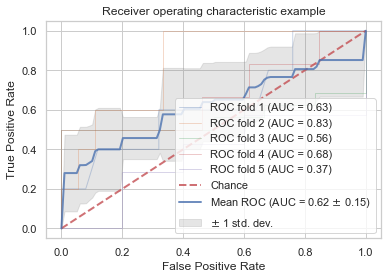

Mean of Each fold


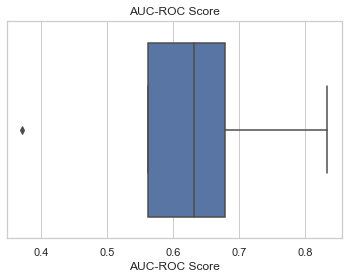

AUC-ROC all:  [0.632, 0.8333333333333334, 0.5625, 0.6794871794871794, 0.37142857142857144]
AUC-ROC = 0.62 ± 0.15)


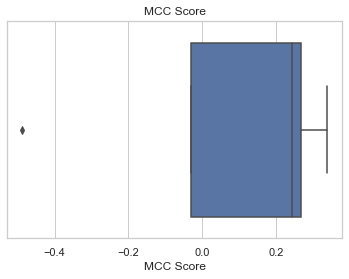

Matthews_corrcoef all:  [-0.030934411244487297, 0.3386481059780782, 0.24333213169614382, 0.2692307692307692, -0.4879500364742666]
Matthews_corrcoef = 0.066 ± 0.304)


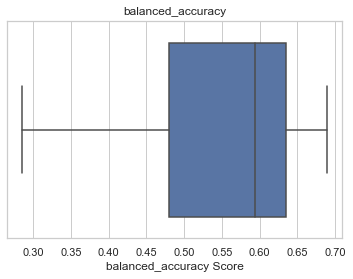

balanced_accuracy all:  [0.48, 0.6888888888888889, 0.59375, 0.6346153846153846, 0.2857142857142857]
balanced_accuracy = 0.54 ± 0.14)


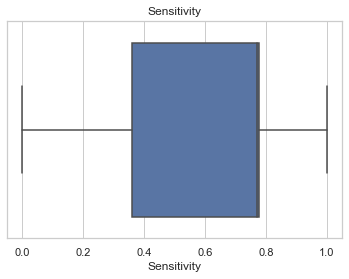

Sensitivity all:  [0.36, 0.7777777777777778, 1.0, 0.7692307692307693, 0.0]
Sensitivity = 0.58 ± 0.36)


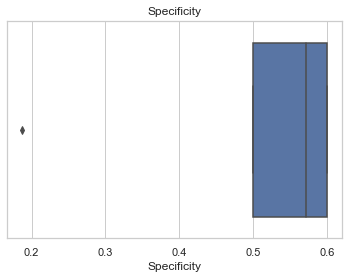

Specificity all:  [0.6, 0.6, 0.1875, 0.5, 0.5714285714285714]
Specificity = 0.49 ± 0.16)
One Combined Confusion Matrix
conf_matrix: 
  [[39 28]
 [23 16]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.63      0.58      0.60        67
         1.0       0.36      0.41      0.39        39

    accuracy                           0.52       106
   macro avg       0.50      0.50      0.50       106
weighted avg       0.53      0.52      0.52       106

matthews_corrcoef
-0.0074909708625267085
balanced_accuracy_score
0.4961729812476081
Sensitivity
0.582089552238806
Specificity
0.41025641025641024
AUC-ROC for the combined results: 


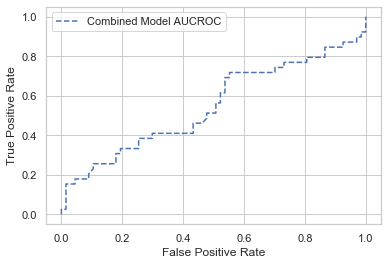

Combined Model AUC ROC:  0.5472636815920398
Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


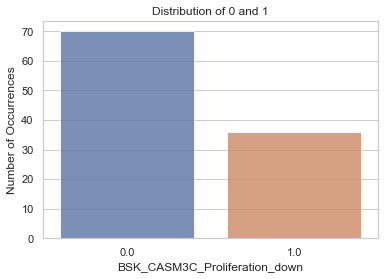

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


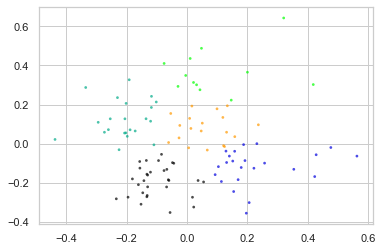

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


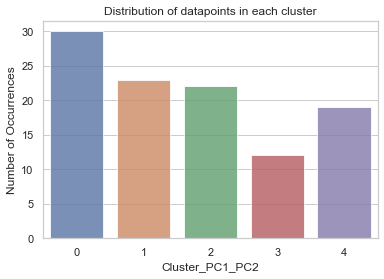

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   56.8s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[16 10]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.62      0.74        26
         1.0       0.23      0.75      0.35         4

    accuracy                           0.63        30
   macro avg       0.59      0.68      0.55        30
weighted avg       0.85      0.63      0.69        30

Total Selected train:  83
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   57.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  8]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.92      0.58      0.71        19
         1.0       0.27      0.75      0.40         4

    accuracy                           0.61        23
   macro avg       0.59      0.66      0.55        23
weighted avg       0.80      0.61      0.66        23

Total Selected train:  84
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   29.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.7min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 7  1]
 [12  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.37      0.88      0.52         8
         1.0       0.67      0.14      0.24        14

    accuracy                           0.41        22
   macro avg       0.52      0.51      0.38        22
weighted avg       0.56      0.41      0.34        22

Total Selected train:  87
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   23.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 4]
 [4 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.69      0.69        13
         1.0       0.33      0.33      0.33         6

    accuracy                           0.58        19
   macro avg       0.51      0.51      0.51        19
weighted avg       0.58      0.58      0.58        19

Total Selected train:  94
Total Selected 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   23.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   43.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 1]
 [4 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.43      0.75      0.55         4
         1.0       0.80      0.50      0.62         8

    accuracy                           0.58        12
   macro avg       0.61      0.62      0.58        12
weighted avg       0.68      0.58      0.59        12



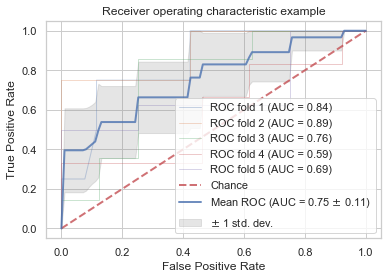

Mean of Each fold


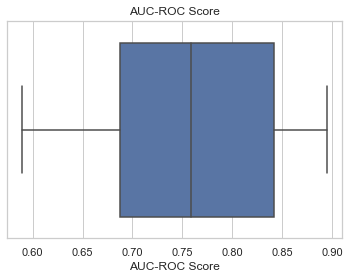

AUC-ROC all:  [0.8413461538461539, 0.8947368421052632, 0.7589285714285714, 0.5897435897435898, 0.6875]
AUC-ROC = 0.75 ± 0.11)


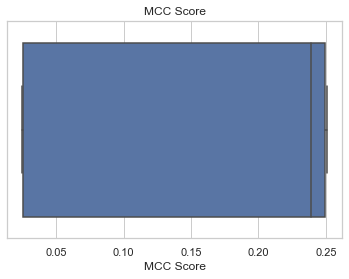

Matthews_corrcoef all:  [0.25065177828520524, 0.24960095744714741, 0.025031308716087945, 0.02564102564102564, 0.23904572186687872]
Matthews_corrcoef = 0.158 ± 0.108)


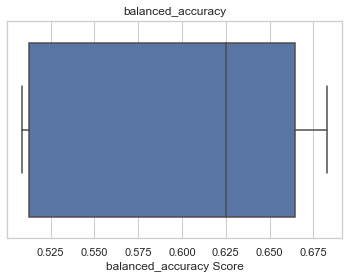

balanced_accuracy all:  [0.6826923076923077, 0.6644736842105263, 0.5089285714285714, 0.5128205128205128, 0.625]
balanced_accuracy = 0.60 ± 0.07)


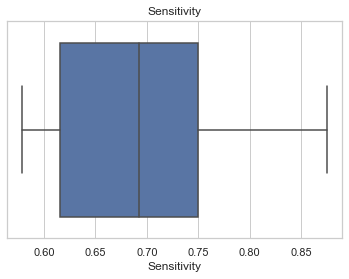

Sensitivity all:  [0.6153846153846154, 0.5789473684210527, 0.875, 0.6923076923076923, 0.75]
Sensitivity = 0.70 ± 0.10)


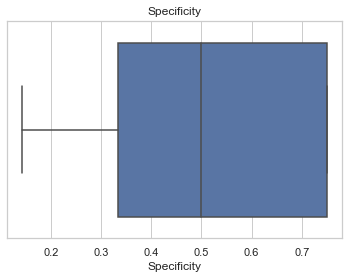

Specificity all:  [0.75, 0.75, 0.14285714285714285, 0.3333333333333333, 0.5]
Specificity = 0.50 ± 0.24)
One Combined Confusion Matrix
conf_matrix: 
  [[46 24]
 [22 14]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.68      0.66      0.67        70
         1.0       0.37      0.39      0.38        36

    accuracy                           0.57       106
   macro avg       0.52      0.52      0.52       106
weighted avg       0.57      0.57      0.57       106

matthews_corrcoef
0.04545811931143052
balanced_accuracy_score
0.523015873015873
Sensitivity
0.6571428571428571
Specificity
0.3888888888888889
AUC-ROC for the combined results: 


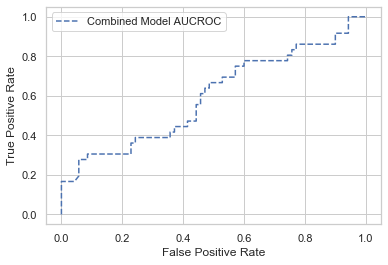

Combined Model AUC ROC:  0.5966269841269841
Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


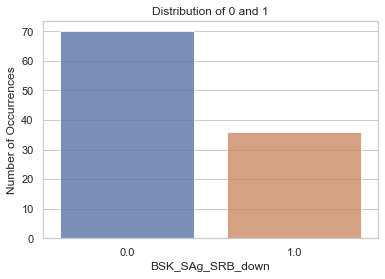

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


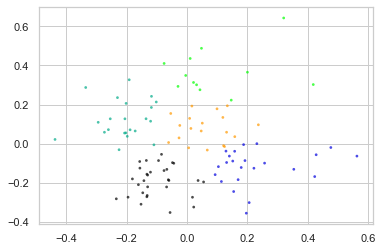

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


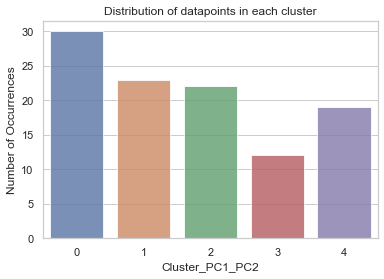

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   51.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10 16]
 [ 0  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       1.00      0.38      0.56        26
         1.0       0.20      1.00      0.33         4

    accuracy                           0.47        30
   macro avg       0.60      0.69      0.44        30
weighted avg       0.89      0.47      0.53        30

Total Selected train:  83
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  6]
 [ 2  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.76        19
         1.0       0.25      0.50      0.33         4

    accuracy                           0.65        23
   macro avg       0.56      0.59      0.55        23
weighted avg       0.76      0.65      0.69        23

Total Selected train:  84
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 6  0]
 [14  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.30      1.00      0.46         6
         1.0       1.00      0.12      0.22        16

    accuracy                           0.36        22
   macro avg       0.65      0.56      0.34        22
weighted avg       0.81      0.36      0.29        22

Total Selected train:  87
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.1s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 4  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.50      0.20      0.29         5

    accuracy                           0.74        19
   macro avg       0.63      0.56      0.56        19
weighted avg       0.70      0.74      0.69        19

Total Selected train:  94
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 2]
 [5 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.38      0.60      0.46         5
         1.0       0.50      0.29      0.36         7

    accuracy                           0.42        12
   macro avg       0.44      0.44      0.41        12
weighted avg       0.45      0.42      0.40        12



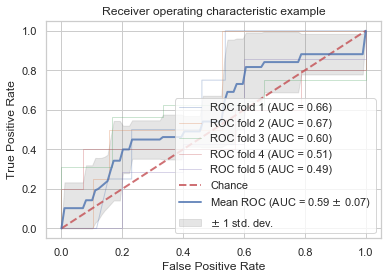

Mean of Each fold


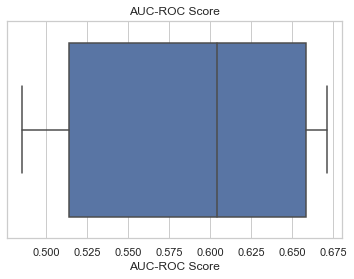

AUC-ROC all:  [0.6586538461538461, 0.6710526315789475, 0.6041666666666666, 0.5142857142857143, 0.4857142857142857]
AUC-ROC = 0.59 ± 0.07)


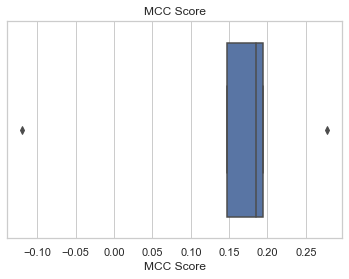

Matthews_corrcoef all:  [0.2773500981126146, 0.14659886790209342, 0.19364916731037085, 0.18448201388042726, -0.11952286093343936]
Matthews_corrcoef = 0.137 ± 0.135)


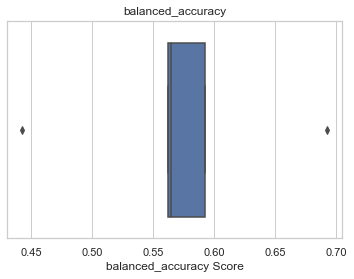

balanced_accuracy all:  [0.6923076923076923, 0.5921052631578947, 0.5625, 0.5642857142857143, 0.44285714285714284]
balanced_accuracy = 0.57 ± 0.08)


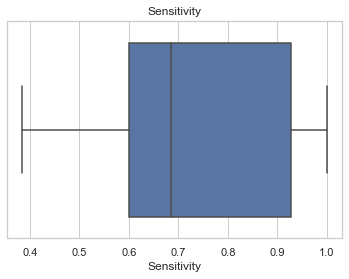

Sensitivity all:  [0.38461538461538464, 0.6842105263157895, 1.0, 0.9285714285714286, 0.6]
Sensitivity = 0.72 ± 0.22)


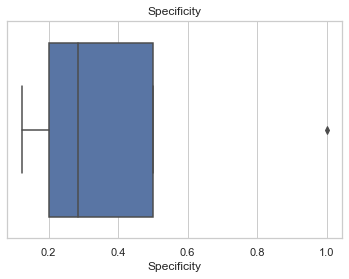

Specificity all:  [1.0, 0.5, 0.125, 0.2, 0.2857142857142857]
Specificity = 0.42 ± 0.32)
One Combined Confusion Matrix
conf_matrix: 
  [[45 25]
 [25 11]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.64      0.64      0.64        70
         1.0       0.31      0.31      0.31        36

    accuracy                           0.53       106
   macro avg       0.47      0.47      0.47       106
weighted avg       0.53      0.53      0.53       106

matthews_corrcoef
-0.051587301587301584
balanced_accuracy_score
0.47420634920634924
Sensitivity
0.6428571428571429
Specificity
0.3055555555555556
AUC-ROC for the combined results: 


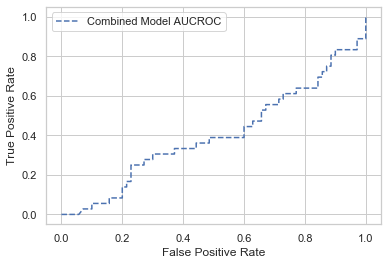

Combined Model AUC ROC:  0.4013888888888889
Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


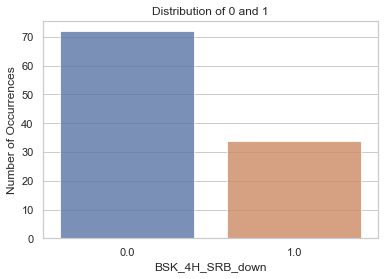

Total Compounds in Assay:  106
pca explained variance by first two components:  0.7210227204267772


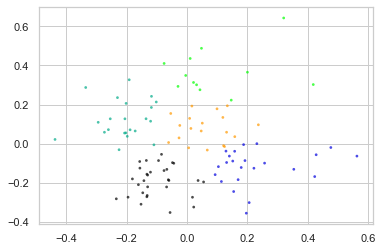

Start
0    30
1    23
2    22
4    19
3    12
Name: Cluster_PC1_PC2, dtype: int64


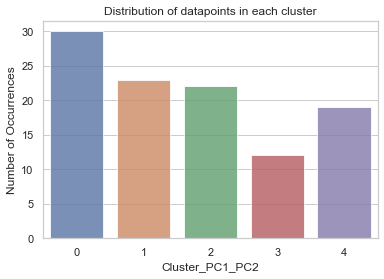

Total Selected train:  76
Total Selected test:  30
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.3min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15 10]
 [ 1  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      0.60      0.73        25
         1.0       0.29      0.80      0.42         5

    accuracy                           0.63        30
   macro avg       0.61      0.70      0.58        30
weighted avg       0.83      0.63      0.68        30

Total Selected train:  83
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.2s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  6]
 [ 1  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.93      0.68      0.79        19
         1.0       0.33      0.75      0.46         4

    accuracy                           0.70        23
   macro avg       0.63      0.72      0.62        23
weighted avg       0.83      0.70      0.73        23

Total Selected train:  84
Total Selec

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[ 8  0]
 [14  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.36      1.00      0.53         8
         1.0       0.00      0.00      0.00        14

    accuracy                           0.36        22
   macro avg       0.18      0.50      0.27        22
weighted avg       0.13      0.36      0.19        22



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  87
Total Selected test:  19
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   59.6s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  2]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        13
         1.0       0.50      0.33      0.40         6

    accuracy                           0.68        19
   macro avg       0.62      0.59      0.59        19
weighted avg       0.66      0.68      0.66        19

Total Selected train:  94
Total Selected

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   27.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   55.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.5min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[3 4]
 [1 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.43      0.55         7
         1.0       0.50      0.80      0.62         5

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



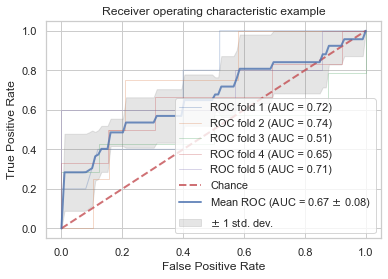

Mean of Each fold


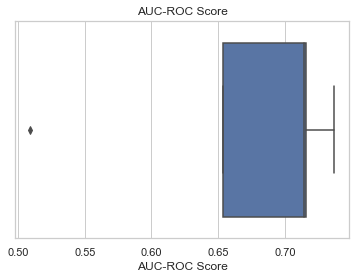

AUC-ROC all:  [0.716, 0.736842105263158, 0.5089285714285714, 0.6538461538461539, 0.7142857142857143]
AUC-ROC = 0.67 ± 0.08)


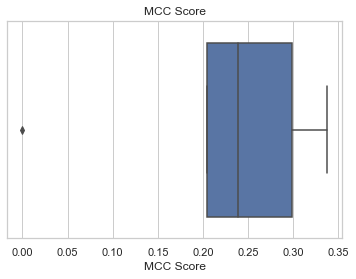

Matthews_corrcoef all:  [0.2988071523335984, 0.3372266367167312, 0.0, 0.20464687117164013, 0.23904572186687872]
Matthews_corrcoef = 0.216 ± 0.117)


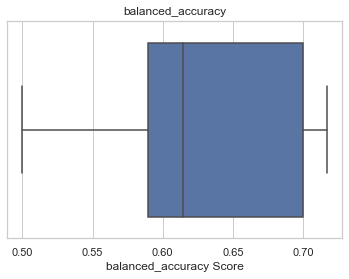

balanced_accuracy all:  [0.7, 0.7171052631578947, 0.5, 0.5897435897435898, 0.6142857142857143]
balanced_accuracy = 0.62 ± 0.08)


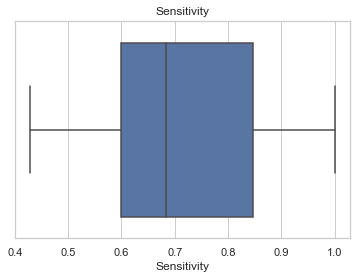

Sensitivity all:  [0.6, 0.6842105263157895, 1.0, 0.8461538461538461, 0.42857142857142855]
Sensitivity = 0.71 ± 0.20)


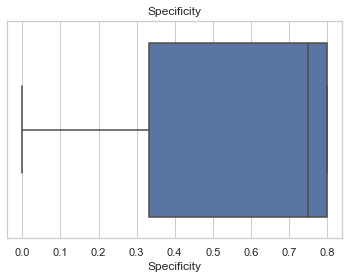

Specificity all:  [0.8, 0.75, 0.0, 0.3333333333333333, 0.8]
Specificity = 0.54 ± 0.32)
One Combined Confusion Matrix
conf_matrix: 
  [[50 22]
 [21 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.69      0.70        72
         1.0       0.37      0.38      0.38        34

    accuracy                           0.59       106
   macro avg       0.54      0.54      0.54       106
weighted avg       0.60      0.59      0.60       106

matthews_corrcoef
0.07622351041465096
balanced_accuracy_score
0.5383986928104575
Sensitivity
0.6944444444444444
Specificity
0.38235294117647056
AUC-ROC for the combined results: 


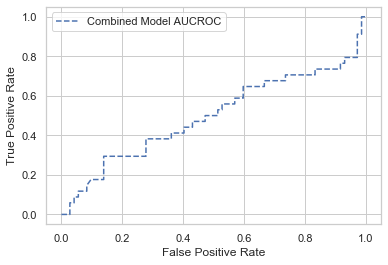

Combined Model AUC ROC:  0.4965277777777778
Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


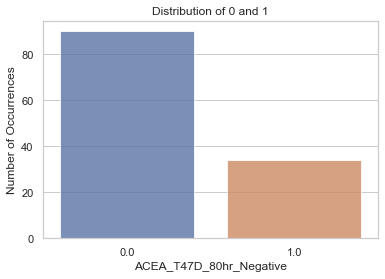

Total Compounds in Assay:  124
pca explained variance by first two components:  0.7273896354684481


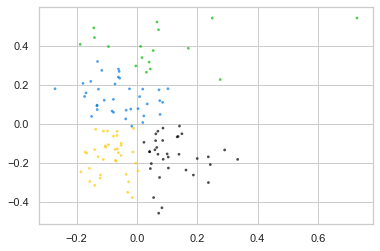

Start
1    37
3    36
0    34
2    17
Name: Cluster_PC1_PC2, dtype: int64


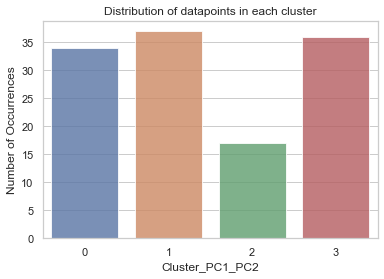

Total Selected train:  87
Total Selected test:  37
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   23.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   50.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.4min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.2min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.1min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[19  1]
 [16  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.54      0.95      0.69        20
         1.0       0.50      0.06      0.11        17

    accuracy                           0.54        37
   macro avg       0.52      0.50      0.40        37
weighted avg       0.52      0.54      0.42        37

Total Selected train:  88
Total Selected test

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   23.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   45.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.4min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[21  8]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        29
         1.0       0.20      0.29      0.24         7

    accuracy                           0.64        36
   macro avg       0.50      0.50      0.50        36
weighted avg       0.69      0.64      0.66        36

Total Selected train:  90
Total Selected test:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   28.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   49.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.1min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[32  0]
 [ 2  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        32
         1.0       0.00      0.00      0.00         2

    accuracy                           0.94        34
   macro avg       0.47      0.50      0.48        34
weighted avg       0.89      0.94      0.91        34



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


Total Selected train:  107
Total Selected test:  17
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   30.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.1min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


Tuned Mode:  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [8 0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.53      1.00      0.69         9
         1.0       0.00      0.00      0.00         8

    accuracy                           0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17



/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


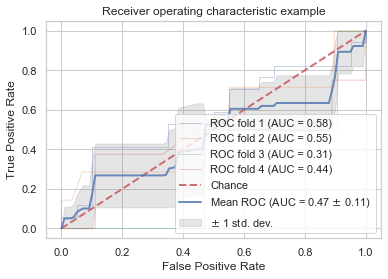

Mean of Each fold


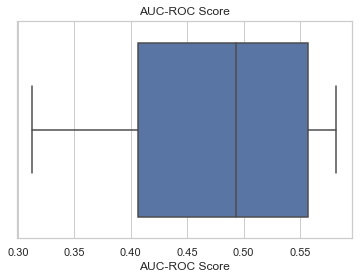

AUC-ROC all:  [0.5823529411764705, 0.5492610837438423, 0.3125, 0.4375]
AUC-ROC = 0.47 ± 0.11)


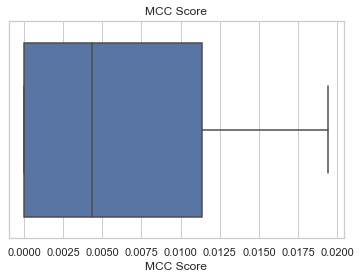

Matthews_corrcoef all:  [0.01944611170656493, 0.008705531728897115, 0.0, 0.0]
Matthews_corrcoef = 0.007 ± 0.008)


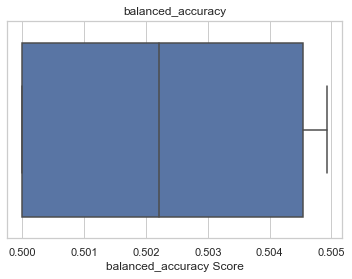

balanced_accuracy all:  [0.5044117647058823, 0.5049261083743842, 0.5, 0.5]
balanced_accuracy = 0.50 ± 0.00)


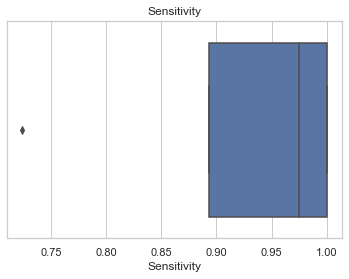

Sensitivity all:  [0.95, 0.7241379310344828, 1.0, 1.0]
Sensitivity = 0.92 ± 0.11)


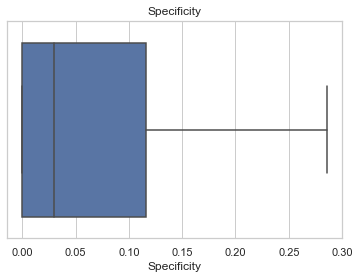

Specificity all:  [0.058823529411764705, 0.2857142857142857, 0.0, 0.0]
Specificity = 0.09 ± 0.12)
One Combined Confusion Matrix
conf_matrix: 
  [[81  9]
 [31  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.90      0.80        90
         1.0       0.25      0.09      0.13        34

    accuracy                           0.68       124
   macro avg       0.49      0.49      0.47       124
weighted avg       0.59      0.68      0.62       124

matthews_corrcoef
-0.017751790062418157
balanced_accuracy_score
0.49411764705882355
Sensitivity
0.9
Specificity
0.08823529411764706
AUC-ROC for the combined results: 


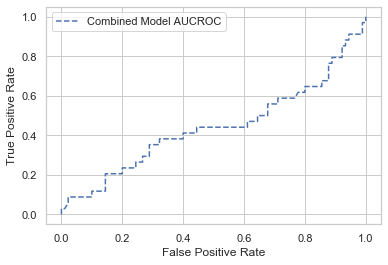

Combined Model AUC ROC:  0.4411764705882353


In [74]:
list_of_lists = []

for col in tox_list:
    
    method = "ErG"
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    target=col
    
    
    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['ErGFingerprint'] =df_temp['smiles_r'].apply(ErGFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)

    X = np.array([x for x in df_temp['ErGFingerprint']])
    
    df_temp=df_temp.drop('ErGFingerprint', axis = 1)
    data=df_temp
    
    data=data.drop('smiles_r', axis = 1)
    y = data[target]

    y=y.to_numpy()
    
    print("Total Compounds in Assay: ", len(X))
    #PCA to groups
    
    df_temp['MolWt']=df_temp['smiles_r'].apply(GetExactMolWt)
    df_temp['TPSA']=df_temp['smiles_r'].apply(GetCalcTPSA) #Topological Polar Surface Area
    df_temp['nRotB']=df_temp['smiles_r'].apply(GetNumRotatableBonds) #Number of rotable bonds
    df_temp['HBD']=df_temp['smiles_r'].apply(GetNumHDonors) #Number of H bond donors
    df_temp['HBA']=df_temp['smiles_r'].apply(GetNumHAcceptors) #Number of H bond acceptors
    df_temp['LogP']=df_temp['smiles_r'].apply(GetMolLogP) #LogP

    descriptors = df_temp.loc[:, ['MolWt', 'TPSA', 'nRotB', 'HBD','HBA', 'LogP']].values
    descriptors_std = StandardScaler().fit_transform(descriptors)
    
    pca = PCA()
    descriptors_2d = pca.fit_transform(descriptors_std)
    descriptors_pca= pd.DataFrame(descriptors_2d)
    descriptors_pca.index = df_temp.index
    descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]

    print("pca explained variance by first two components: ", (pca.explained_variance_ratio_[0]+ pca.explained_variance_ratio_[1]))

    # This normalization will be performed just for PC1 and PC2, but can be done for all the components.
    scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
    scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

    # And we add the new values to our PCA table
    descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
    descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    
  
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster)
    plt.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    plt.show()
    
    
    df_temp['Cluster_PC1_PC2'] = pd.Series(kmeans.labels_, index=df_temp.index)
    print("Start")
    cluster_counts=df_temp['Cluster_PC1_PC2'].value_counts()
    print(df_temp['Cluster_PC1_PC2'].value_counts())
    plt.figure()
    sns.barplot(cluster_counts.index, cluster_counts.values, alpha=0.8)
    plt.title('Distribution of datapoints in each cluster')
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Cluster_PC1_PC2', fontsize=12)
    plt.show()
    
    
    outercv = GroupKFold(n_splits=n_cluster)
    outercv.get_n_splits(X, y, kmeans.labels_)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y, kmeans.labels_)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
           
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

       # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs = 40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print("Tuned Mode: ", grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        classifier.fit(X_train, y_train)
        
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    
    
    print("Mean of Each fold")
    
    sns.boxplot(x=aucs).set(title = 'AUC-ROC Score', xlabel = 'AUC-ROC Score' )
    plt.show()
    print("AUC-ROC all: ",(aucs))
    print(r"AUC-ROC = %0.2f ± %0.2f)" % (np.mean(aucs), np.std(aucs)))
    row=[col, method, 'AUC-ROC'] + aucs
    list_of_lists.append(row)
    sns.set(style="whitegrid")    
    
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print(r"Matthews_corrcoef = %0.3f ± %0.3f)" % (np.mean(mat_cof), np.std(mat_cof)))
    row=[col, method, 'MCC'] + mat_cof
    list_of_lists.append(row)
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print(r"balanced_accuracy = %0.2f ± %0.2f)" % (np.mean(ba), np.std(ba)))
    row=[col, method, 'BA'] + ba
    list_of_lists.append(row)
    
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print(r"Sensitivity = %0.2f ± %0.2f)" % (np.mean(sen), np.std(sen)))
    row=[col, method, 'SEN'] + sen
    list_of_lists.append(row)
    
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print(r"Specificity = %0.2f ± %0.2f)" % (np.mean(spe), np.std(spe)))
    row=[col, method, 'SPE'] + spe
    list_of_lists.append(row)
    
    
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    print(matthews_corrcoef(combined_y_test, combined_y_pred))
    
    print('balanced_accuracy_score')
    print(balanced_accuracy_score(combined_y_test, combined_y_pred))
    
    print('Sensitivity')   
    print(combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1]))
    
    print('Specificity')  
    print(combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1]))
       
    print("AUC-ROC for the combined results: ")
    
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    print("Combined Model AUC ROC: ", roc_value_combined_model)

In [78]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "metric", "1", "2", "3", "4", "5"])
df['mean']=df.drop(['target', 'method', 'metric'], axis=1).apply(lambda x: x.mean(), axis=1)
df['std']=df.drop(['target', 'method','metric'], axis=1).apply(lambda x: x.std(), axis=1)
df['value']= df['mean'].round(2).astype(str) + " ± " + df['std'].round(2).astype(str)

In [79]:
df

,target,method,metric,1,2,3,4,5,mean,std,value
0,BSK_hDFCGF_Proliferation_down,ErG,AUC-ROC,0.451705,0.509804,0.666667,0.633333,0.636364,0.579574,0.083569,0.58 ± 0.08
1,BSK_hDFCGF_Proliferation_down,ErG,MCC,-0.141019,0.177764,0.164957,0.266667,0.301511,0.153976,0.156317,0.15 ± 0.16
2,BSK_hDFCGF_Proliferation_down,ErG,BA,0.460227,0.593137,0.690476,0.633333,0.772727,0.629980,0.104136,0.63 ± 0.1
3,BSK_hDFCGF_Proliferation_down,ErG,SEN,0.045455,0.352941,1.000000,0.666667,1.000000,0.613012,0.372064,0.61 ± 0.37
4,BSK_hDFCGF_Proliferation_down,ErG,SPE,0.875000,0.833333,0.380952,0.600000,0.545455,0.646948,0.184394,0.65 ± 0.18
5,APR_HepG2_CellLoss_72h_dn,ErG,AUC-ROC,0.574074,0.675926,0.264706,0.590909,0.718750,0.564873,0.159295,0.56 ± 0.16
6,APR_HepG2_CellLoss_72h_dn,ErG,MCC,-0.043033,0.416667,0.140028,-0.025950,-0.316228,0.034297,0.240775,0.03 ± 0.24
7,APR_HepG2_CellLoss_72h_dn,ErG,BA,0.472222,0.708333,0.558824,0.484848,0.375000,0.519846,0.110923,0.52 ± 0.11
8,APR_HepG2_CellLoss_72h_dn,ErG,SEN,0.666667,0.750000,0.117647,0.333333,0.750000,0.523529,0.254551,0.52 ± 0.25
9,APR_HepG2_CellLoss_72h_dn,ErG,SPE,0.277778,0.666667,1.000000,0.636364,0.000000,0.516162,0.344804,0.52 ± 0.34


In [80]:
file_name="Metrics_"+method+".csv"
df.to_csv(file_name)